In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score

import tensorflow as tf

np.random.seed(1)

In [117]:
# read data
df = pd.read_csv('../../data/preprocessed_models_data.csv')
df.describe()

,SSL SCORE,PREDICTOR RAT VICTIM SHOOTING INCIDENTS,PREDICTOR RAT VICTIM BATTERY OR ASSAULT,PREDICTOR RAT ARRESTS VIOLENT OFFENSES,PREDICTOR RAT GANG AFFILIATION,PREDICTOR RAT NARCOTIC ARRESTS,PREDICTOR RAT TREND IN CRIMINAL ACTIVITY,PREDICTOR RAT UUW ARRESTS,PREDICTOR RAT AGE AT LATEST ARREST_20-30,PREDICTOR RAT AGE AT LATEST ARREST_30-40,PREDICTOR RAT AGE AT LATEST ARREST_40-50,PREDICTOR RAT AGE AT LATEST ARREST_50-60,PREDICTOR RAT AGE AT LATEST ARREST_60-70,PREDICTOR RAT AGE AT LATEST ARREST_70-80,PREDICTOR RAT AGE AT LATEST ARREST_less than 20
count,227718.000000,227718.000000,227718.000000,227718.000000,227718.000000,227718.000000,227718.000000,227718.000000,227718.000000,227718.000000,227718.000000,227718.000000,227718.000000,227718.000000,227718.000000
mean,0.722819,0.032163,0.055758,0.154204,0.255035,0.476133,-0.066688,0.046681,0.343390,0.210001,0.145434,0.094384,0.020359,0.002244,0.184188
std,0.447607,0.192319,0.261376,0.466019,0.435882,0.999584,0.445321,0.227326,0.474841,0.407310,0.352539,0.292363,0.141224,0.047318,0.387639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.000000,10.000000,12.000000,1.000000,27.000000,7.300000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
# Labels are the values we want to predict
labels = np.array(df['SSL SCORE']) # Y
df = df.drop('SSL SCORE', axis = 1)
x_list = list(df.columns) # X
# Convert to numpy array
df = np.array(df)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size = 0.25, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(170788, 14) (56930, 14) (170788,) (56930,)


# Neural Network

In [121]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [122]:
predictions = model(X_train[:1]).numpy()
predictions

array([[-0.00787941, -0.08216179, -0.31747866,  0.14905638,  0.02598338,
        -0.47221005,  0.02225891,  0.08053692, -0.12312759, -0.0280566 ]],
      dtype=float32)

In [123]:
tf.nn.softmax(predictions).numpy()

array([[0.10538207, 0.09783772, 0.07732314, 0.12328865, 0.10901172,
        0.06623851, 0.10860647, 0.11512388, 0.0939107 , 0.10327707]],
      dtype=float32)

In [124]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [125]:
loss_fn(y_train[:1], predictions).numpy()

2.2501626

In [126]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [127]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
5338/5338 [==============================] - 17s 3ms/step - loss: 0.0988 - accuracy: 0.9671
Epoch 2/5
5338/5338 [==============================] - 15s 3ms/step - loss: 0.0818 - accuracy: 0.9691
Epoch 3/5
5338/5338 [==============================] - 19s 4ms/step - loss: 0.0811 - accuracy: 0.9690
Epoch 4/5
5338/5338 [==============================] - 18s 3ms/step - loss: 0.0807 - accuracy: 0.9693
Epoch 5/5
5338/5338 [==============================] - 18s 3ms/step - loss: 0.0803 - accuracy: 0.9692


In [137]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

1780/1780 [==============================] - 4s 2ms/step


In [138]:
print(y_test.shape, y_pred.shape)

(56930,) (56930,)


Text(0.5, 427.9555555555555, 'Predicted label')

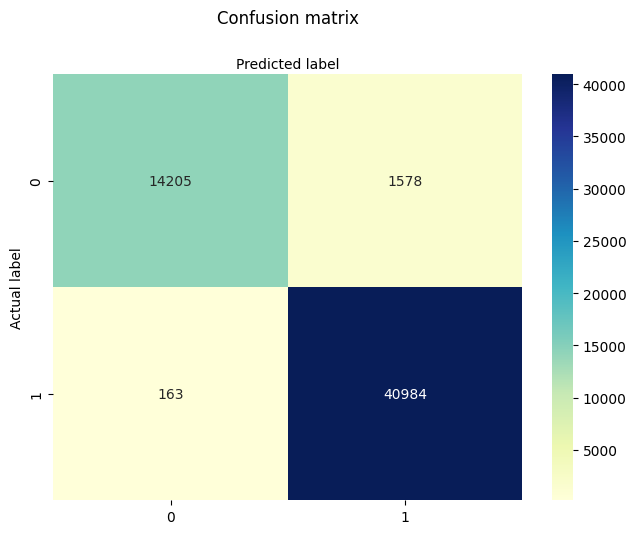

In [139]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [142]:
target_names = ['LOW SSL SCORE', 'HIGH SSL SCORE']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

 LOW SSL SCORE       0.99      0.90      0.94     15783
HIGH SSL SCORE       0.96      1.00      0.98     41147

      accuracy                           0.97     56930
     macro avg       0.98      0.95      0.96     56930
  weighted avg       0.97      0.97      0.97     56930



In [140]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred))

Accuracy: 0.9694
Precision: 0.9629
Recall: 0.9960
F1 Score: 0.9792
